## Remove 10% of the data and store it in a secret box to calculate AUC_est later

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_data = pd.read_csv('training_smiles.csv')
raw_data.drop('INDEX', axis=1, inplace=True)

indices_to_remove = np.random.choice(len(raw_data), int(0.1 * len(raw_data)), replace=False)
auc_est_data = raw_data.iloc[indices_to_remove].copy()
auc_est_data.reset_index(inplace=True)
auc_est_data.drop('index', axis=1, inplace=True)

raw_data.drop(indices_to_remove, axis=0, inplace=True)
raw_data.reset_index(inplace=True)
raw_data.drop('index', axis=1, inplace=True)

# display(raw_data)
# display(auc_est_data)

## Investigate how many active compounds there are and how they're distributed throughout the two datasets

Conclusions: the active compounds seems to be somewhat evenly distributed throughout the dataset - no need to manipulate the dataset further

Number of active compounds in the general dataset: 381/133709 (0.0028%)


C:\Users\CARBON~1\AppData\Local\Temp/ipykernel_9596/3061722826.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()
C:\Users\CARBON~1\AppData\Local\Temp/ipykernel_9596/3061722826.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f2.show()


Number of active compounds in the AUC_est dataset: 41/14856 (0.0028%)


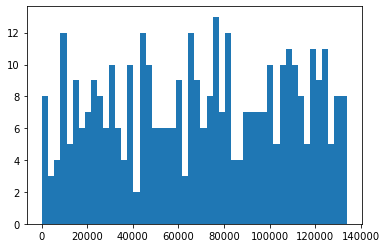

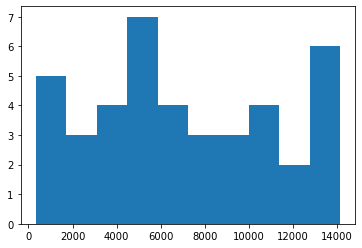

In [122]:
y = [int(label) for label in raw_data['ACTIVE'].values]
y_auc_est = [int(label) for label in auc_est_data['ACTIVE'].values]

# Check the data we're going to work with
indices = [index for index in range(len(y)) if y[index] == 1]
num_ones = len(indices)
print('Number of active compounds in the general dataset: ' + str(len(indices)) + '/' + str(len(y)) + ' (' + str(round(num_ones/len(y) * 100, 2)) + '%)')
f1 = plt.figure(1)
plt.hist(indices, bins=50)
f1.show()

# Check the AUC_est data
indices = [index for index in range(len(y_auc_est)) if y_auc_est[index] == 1]
num_ones = len(indices)
print('Number of active compounds in the AUC_est dataset: ' + str(len(indices)) + '/' + str(len(y_auc_est)) + ' (' + str(round(num_ones/len(y_auc_est) * 100, 2)) + '%)')
f2 = plt.figure(2)
plt.hist(indices, bins=10)
f2.show()

## Save the data (OBSERVE: Do not run the code below, we're happy with the split we have right now!!)

In [123]:
# auc_est_data.to_csv('auc_est_training_smiles.csv')
# raw_data.to_csv('new_training_smiles.csv')